<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/GPU_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

Select the processor device

In [3]:
#use GPU
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


Build a simple model

In [4]:
net=nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2),
)

Make some data

In [ ]:
#just some random fluff
data=torch.randn((1000,20)) #samples X features
labels=torch.randint(low=0,high=2,size=(1,1000)) #samples X labels
labels

Send the model and the data to the GPU

In [10]:
#model
net.to(device)
#data
data=data.to(device)
labels=labels.to(device)
#
data

tensor([[-0.1960, -0.4537, -0.4620,  ...,  1.3896, -0.6407, -0.4682],
        [-0.4795,  0.6234, -0.9654,  ..., -0.7250,  1.5526, -0.5641],
        [-1.4619, -0.4896, -1.3069,  ..., -0.1491,  0.0161,  0.3690],
        ...,
        [-0.6185, -0.3004,  0.6604,  ..., -0.2420,  0.7704, -0.1141],
        [ 0.5811,  2.2209, -0.2809,  ..., -0.7275,  1.2687,  0.5526],
        [ 0.2339, -0.4329,  0.6585,  ...,  0.6000, -0.1369, -0.4887]],
       device='cuda:0')

In [11]:
#you can also create data directly on the GPU
dataG=torch.randn((1000,20),device=device)
dataC=torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


In [12]:
output=net(data)
output.device

device(type='cuda', index=0)

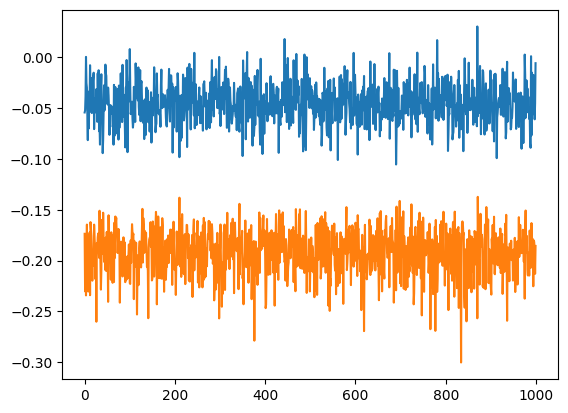

In [13]:
plt.plot(output.detach().cpu());

Experiment:Computation time

In [18]:
#start the clock
starttime=time.process_time()
#move,run,retrieve
device='cuda:0'
net.to(device)
data=data.to(device)
labels=labels.to(device)
output=net(data).detach().cpu()
#stop the clock
GPUtime=1000*(time.process_time()-starttime)

In [19]:
#start the clock
starttime=time.process_time()
#move,run,retrieve
device='cpu'
net.to(device)
data=data.to(device)
labels=labels.to(device)
output=net(data).detach().cpu()
#stop the clock
CPUtime=1000*(time.process_time()-starttime)

In [20]:
#time in ms
[CPUtime,GPUtime]

[6.08797099999947, 3.156015000001844]

In [21]:
#MAY BE SENDING TO A CPU TAKES SO MUCH TIME

net=nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2),
)
data=torch.randn(( 1000,20))
##rerun the experiment
starttime=time.process_time()
output=net(data).detach()
CPUtime2=1000*(time.process_time()-starttime)
#report the results
[CPUtime2,CPUtime,GPUtime]

[3.856881000004364, 6.08797099999947, 3.156015000001844]